In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import re

In [63]:
#Load the dataset
df2 = pd.read_csv("C:/Users/User/Desktop/sentiment_analysis/archive (1)/redmi6.csv",encoding='latin1')

In [64]:
df2.head() #Display the first few rows


,Review Title,Customer name,Rating,Date,Category,Comments,Useful
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful


In [65]:
df2.info()   #Overview of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Review Title   280 non-null    object
 1   Customer name  280 non-null    object
 2   Rating         280 non-null    object
 3   Date           280 non-null    object
 4   Category       280 non-null    object
 5   Comments       280 non-null    object
 6   Useful         110 non-null    object
dtypes: object(7)
memory usage: 15.4+ KB


In [66]:
df2.isnull().sum()  # Check for missing values

Review Title       0
Customer name      0
Rating             0
Date               0
Category           0
Comments           0
Useful           170
dtype: int64

In [67]:
df2['Rating'].value_counts()

5.0 out of 5 stars    151
4.0 out of 5 stars     50
1.0 out of 5 stars     43
3.0 out of 5 stars     27
2.0 out of 5 stars      9
Name: Rating, dtype: int64

In [68]:
df2["Category"].unique()

array(['Display', 'Others', 'Camera', 'Battery', 'Delivery'], dtype=object)

In [69]:
df2['Comments'].head()

0    Another Midrange killer Smartphone by Xiaomi\n...
1                     All ok but vry small size mobile
2                                           Quite good
3    Redmi has always have been the the king of bud...
4    worst product from MI. I am a hardcore fan of ...
Name: Comments, dtype: object

In [102]:
#for i in df2['Comments']:
    #print(i + '\n')

another midrange killer smartphone by xiaomi

major highlights
 the redmi  pro sports a inch fullhd display with a notch
 powered by the qualcomm snapdragon  soc
 the phone is priced at rs  for the gb ram variant start point
 battery of  mah and its durability
 the tripple slots
 dual ai camera

well in redmi  series you will get  different smartphones with different specs and from all of them redmi  pro is most powerful and advanced as said by redmi india in their launch event

xiaomi redmi  pro design
being the most premium phone of the new redmi  family the redmi  pro has been given somewhat better materials in the form of a metal backplate however the overall design isnt too different from what weve already seen from xiaomi at around this price point this is a fairly thick phone and its a bit hefty too but its manageable the buttons have good feedback without being noisy and on the left side you get a single tray which can hold two sim cards and a separate microsd card something wo

## Preprocess the Text Data

In [71]:
#Text Processing 
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters (anything that's not a letter or space)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    
    # Return the cleaned text
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
df2['Comments'] =df2['Comments'].apply(clean_text) 

In [73]:
ratings=[]
for i in df2['Rating']:
    rating = re.search(r'\d',i)
    ratings.append(rating.group())
    
ratings
df2['Label'] = ratings

In [74]:
df2['Label'].dtype

dtype('O')

In [75]:
df2.columns

Index(['Review Title', 'Customer name', 'Rating', 'Date', 'Category',
       'Comments', 'Useful', 'Label'],
      dtype='object')

In [76]:
#df.drop(["Customer name", "Rating", "Date","Useful"], axis=1, inplace=True)
#df.head() 

In [77]:
df2.dtypes

Review Title     object
Customer name    object
Rating           object
Date             object
Category         object
Comments         object
Useful           object
Label            object
dtype: object

In [78]:
# Convert each element in the column to an integer
df2['Label'] = df2['Label'].apply(lambda x: int(x))  

In [79]:
mapping = {1:-1,2:-1,3:0,4:1,5:1}
df2['Label_encoded'] = df2['Label'].map(mapping) #It defines how specific values in the Label column should be transformed.
#For example, 1 and 2 are mapped to -1, 3 is mapped to 0, and 4 and 5 are mapped to 1.

In [80]:
# Get all unique values in the 'Label' column
unique_values = set(df2['Label'].unique())

# Get all keys in the mapping dictionary
mapping_keys = set(mapping.keys())

# Check for values in the 'Label' column that are not in the mapping dictionary
unmapped_values = unique_values - mapping_keys

# Print the result
if unmapped_values:
    print(f"The following values are not in the mapping dictionary: {unmapped_values}")
else:
    print("All values in the 'Label' column are included in the mapping dictionary.")


All values in the 'Label' column are included in the mapping dictionary.


In [81]:
df2

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Label,Label_encoded
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,another midrange killer smartphone by xiaomi\n...,,4,1
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,all ok but vry small size mobile,7 people found this helpful,3,0
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,quite good,7 people found this helpful,3,0
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,redmi has always have been the the king of bud...,2 people found this helpful,5,1
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from mi i am a hardcore fan of m...,6 people found this helpful,2,-1
...,...,...,...,...,...,...,...,...,...
275,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,i like this phone awesome look and design\nim ...,NaN,5,1
276,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,product is avasome but invoice is note include,NaN,4,1
277,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,on 15 September 2018,Battery,redmi note note now proit seems the older the ...,NaN,3,0
278,Redmi,Mahesh,5.0 out of 5 stars,on 21 September 2018,Others,i love mi,NaN,5,1


### Convert Text Data into Features

In [82]:
#Use TF-IDF Vectorizer to convert text data into numerical format
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df2['Comments'])
y = df2['Label_encoded']

In [83]:
df2['Comments'].isnull().sum()

0

In [84]:
df2['Label_encoded'].dtype

dtype('int64')

## Train a Sentiment Analysis Model

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

model_svc = SVC()
model_svc.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svc = model_svc.predict(X_test)


print("Accuracy lr:", accuracy_score(y_test, y_pred_lr))
print("Classification Report lr:\n", classification_report(y_test, y_pred_lr))

print("Accuracy rf:", accuracy_score(y_test, y_pred_rf))
print("Classification Report rf:\n", classification_report(y_test, y_pred_rf))

print("Accuracy svc:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:svc\n", classification_report(y_test, y_pred_svc))

sample_tweets = ["I love mi", "quite good but small"]
sample_features = vectorizer.transform(sample_tweets)
#predictions = model.predict(sample_features)
#print("Predictions:", predictions)
predictions_lr = model_lr.predict(sample_features)
predictions_rf = model_rf.predict(sample_features)
predictions_svc = model_svc.predict(sample_features)

print("\nPredictions for sample tweets:")
print("Logistic Regression:", predictions_lr)
print("Random Forest:", predictions_rf)
print("SVC:", predictions_svc)

Accuracy lr: 0.8928571428571429
Classification Report lr:
               precision    recall  f1-score   support

          -1       1.00      0.67      0.80         9
           0       0.00      0.00      0.00         3
           1       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.63      0.56      0.58        56
weighted avg       0.85      0.89      0.86        56

Accuracy rf: 0.8392857142857143
Classification Report rf:
               precision    recall  f1-score   support

          -1       0.62      0.56      0.59         9
           0       1.00      0.33      0.50         3
           1       0.87      0.93      0.90        44

    accuracy                           0.84        56
   macro avg       0.83      0.61      0.66        56
weighted avg       0.84      0.84      0.83        56

Accuracy svc: 0.875
Classification Report:svc
               precision    recall  f1-score   support

          -1      

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [86]:
df2

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Label,Label_encoded
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,another midrange killer smartphone by xiaomi\n...,,4,1
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,all ok but vry small size mobile,7 people found this helpful,3,0
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,quite good,7 people found this helpful,3,0
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,redmi has always have been the the king of bud...,2 people found this helpful,5,1
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from mi i am a hardcore fan of m...,6 people found this helpful,2,-1
...,...,...,...,...,...,...,...,...,...
275,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,i like this phone awesome look and design\nim ...,NaN,5,1
276,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,product is avasome but invoice is note include,NaN,4,1
277,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,on 15 September 2018,Battery,redmi note note now proit seems the older the ...,NaN,3,0
278,Redmi,Mahesh,5.0 out of 5 stars,on 21 September 2018,Others,i love mi,NaN,5,1


"The current model predictions have relatively low accuracy; therefore, hyperparameter tuning with GridSearchCV will be used to optimize performance."

In [101]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import numpy as np

# Assuming your dataset is in df2['Comments'] (text) and df2['Label_encoded'] (labels)
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')  # Adding n-grams and stop words removal
X = vectorizer.fit_transform(df2['Comments'])
y = df2['Label_encoded']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression: Hyperparameter Tuning
param_grid_lr = {
    'C': [0.1, 1, 10, 100],  # Added higher values for more flexibility
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Added more solvers
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

# Random Forest: Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],  # More estimators for better performance
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],  # Added more options for leaf nodes
    'max_features': ['sqrt', 'log2']  # Added max_features for tree randomness
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1,)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Support Vector Classifier: Hyperparameter Tuning
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [3, 4, 5],  # Only used for 'poly' kernel
    'coef0': [0, 0.1, 1],  # Only used for 'poly' and 'sigmoid' kernels
    'class_weight': ['balanced', None],
    'max_iter': [1000, 5000, 10000]
}

grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)
best_svc = grid_svc.best_estimator_

# Evaluate Models
y_pred_lr = best_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_svc = best_svc.predict(X_test)

print("Logistic Regression Best Parameters:", grid_lr.best_params_)
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

print("Random Forest Best Parameters:", grid_rf.best_params_)
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

print("SVC Best Parameters:", grid_svc.best_params_)
print("Accuracy (SVC):", accuracy_score(y_test, y_pred_svc))
print("Classification Report (SVC):\n", classification_report(y_test, y_pred_svc))

# Ensemble: Voting Classifier (using SVC, RF, and LR)
voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('rf', best_rf),
    ('svc', best_svc)
], voting='hard')  # Hard voting combines the majority predictions
voting_clf.fit(X_train, y_train)

# Predict with the Voting Classifier
y_pred_voting = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report (Voting Classifier):\n", classification_report(y_test, y_pred_voting))

# Predict on Sample Tweets
sample_tweets = ["I love mi", "worst product from MI"]
sample_features = vectorizer.transform(sample_tweets)

predictions_lr = best_lr.predict(sample_features)
predictions_rf = best_rf.predict(sample_features)
predictions_svc = best_svc.predict(sample_features)
predictions_voting = voting_clf.predict(sample_features)

print("Predictions (Logistic Regression):", predictions_lr)
print("Predictions (Random Forest):", predictions_rf)
print("Predictions (SVC):", predictions_svc)
print("Predictions (Voting Classifier):", predictions_voting)


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

Logistic Regression Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy (Logistic Regression): 0.9285714285714286
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

          -1       0.89      0.89      0.89         9
           0       1.00      0.33      0.50         3
           1       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.94      0.73      0.78        56
weighted avg       0.93      0.93      0.92        56

Random Forest Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy (Random Forest): 0.8928571428571429
Classification Report (Random Forest):
               precision    recall  f1-score   support

          -1       1.00      0.56      0.71         9
           0       1.00      0.33      0.50         3
           1       0.88      1.00      0.94     

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Voting Classifier Accuracy: 0.9107142857142857
Classification Report (Voting Classifier):
               precision    recall  f1-score   support

          -1       0.88      0.78      0.82         9
           0       1.00      0.33      0.50         3
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.93      0.70      0.76        56
weighted avg       0.91      0.91      0.90        56

Predictions (Logistic Regression): [ 1 -1]
Predictions (Random Forest): [ 1 -1]
Predictions (SVC): [ 1 -1]
Predictions (Voting Classifier): [ 1 -1]


In [88]:
df2

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Label,Label_encoded
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,another midrange killer smartphone by xiaomi\n...,,4,1
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,all ok but vry small size mobile,7 people found this helpful,3,0
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,quite good,7 people found this helpful,3,0
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,redmi has always have been the the king of bud...,2 people found this helpful,5,1
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from mi i am a hardcore fan of m...,6 people found this helpful,2,-1
...,...,...,...,...,...,...,...,...,...
275,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,i like this phone awesome look and design\nim ...,NaN,5,1
276,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,product is avasome but invoice is note include,NaN,4,1
277,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,on 15 September 2018,Battery,redmi note note now proit seems the older the ...,NaN,3,0
278,Redmi,Mahesh,5.0 out of 5 stars,on 21 September 2018,Others,i love mi,NaN,5,1


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

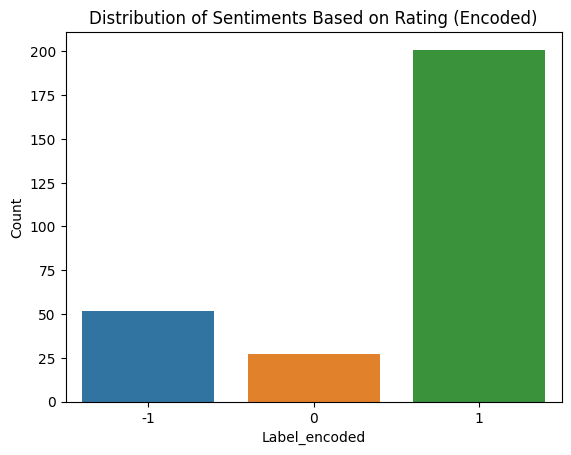

In [90]:
sns.countplot(data=df2, x='Label_encoded', order=[-1, 0, 1])
plt.title('Distribution of Sentiments Based on Rating (Encoded)')
plt.xlabel('Label_encoded')
plt.ylabel('Count')
plt.show()

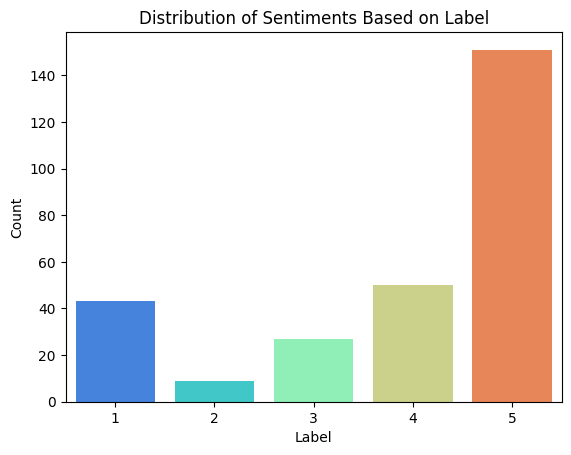

In [99]:
sns.countplot(data=df2, x='Label',palette='rainbow')
plt.title('Distribution of Sentiments Based on Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

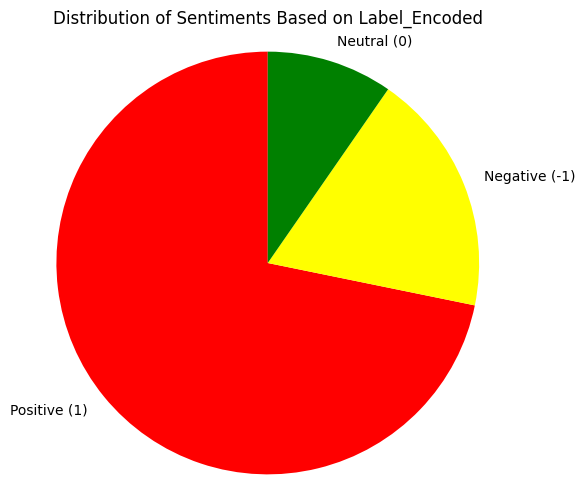

In [100]:
# Plot the pie chart
sentiment_labels = ['Positive (1)', 'Negative (-1)', 'Neutral (0)']
sentiment_counts = df2['Label_encoded'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_labels, startangle=90, colors=['red', 'yellow', 'green'])
plt.title('Distribution of Sentiments Based on Label_Encoded')
plt.axis('equal')
plt.show()